# Day 6
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, DO30

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam', 'do':30}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.169s 


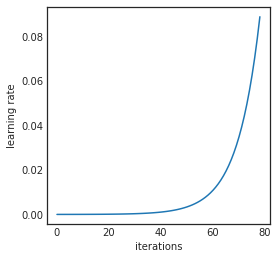

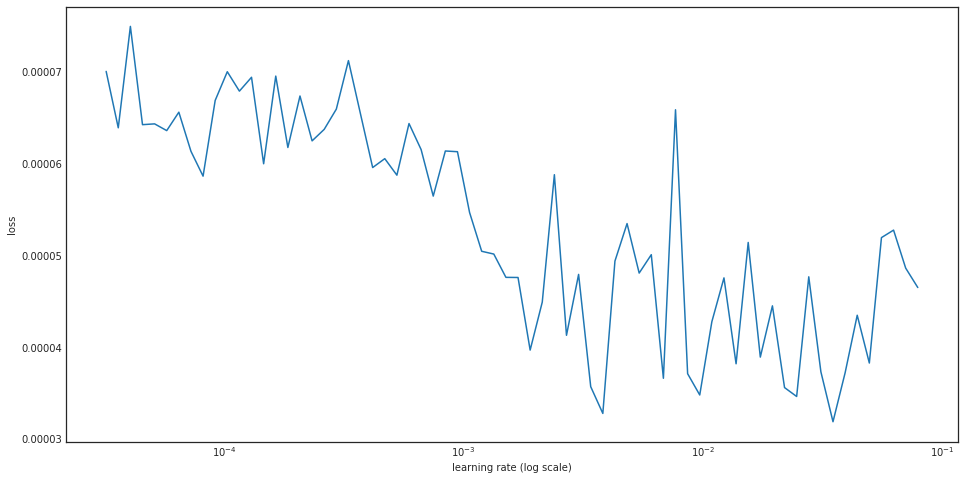

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.17348653929e-05
2 New best found: 3.70699525652e-05
3 New best found: 3.64448644293e-05
4 New best found: 3.58517839361e-05
5 New best found: 3.49136991565e-05
6 New best found: 3.45888584835e-05
7 New best found: 3.43625755271e-05
8 New best found: 3.41958190715e-05
10 New best found: 3.34808785045e-05
11 New best found: 3.33639390702e-05
12 New best found: 3.31644935824e-05
13 New best found: 3.30590692178e-05
14 New best found: 3.29255472838e-05
21 New best found: 3.2866179041e-05
22 New best found: 3.27924699509e-05
23 New best found: 3.25913924734e-05
25 New best found: 3.25340507904e-05
26 New best found: 3.24429966119e-05
27 New best found: 3.24281638529e-05
28 New best found: 3.23738748299e-05
29 New best found: 3.23406367189e-05
30 New best found: 3.23362362348e-05
31 New best found: 3.23293078216e-05
39 New best found: 3.23254142214e-05
46 New best fo

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100006). Check your callbacks.
  % delta_t_median)


1 New best found: 4.16319011263e-05
2 New best found: 3.73003002538e-05
3 New best found: 3.59316899247e-05
5 New best found: 3.39951860162e-05
6 New best found: 3.34782482415e-05
7 New best found: 3.3400196914e-05
9 New best found: 3.32443144994e-05
10 New best found: 3.27135581265e-05
12 New best found: 3.26988168222e-05
13 New best found: 3.23420285596e-05
14 New best found: 3.23389456582e-05
15 New best found: 3.23325400575e-05
21 New best found: 3.21475020955e-05
24 New best found: 3.21037686528e-05
25 New best found: 3.19882250013e-05
27 New best found: 3.19230480546e-05
28 New best found: 3.18461539314e-05
29 New best found: 3.1724080617e-05
30 New best found: 3.17170317881e-05
44 New best found: 3.16527641759e-05
48 New best found: 3.15169941464e-05
50 New best found: 3.15005226966e-05
53 New best found: 3.1412110722e-05
56 New best found: 3.13356491233e-05
59 New best found: 3.13332910875e-05
99 New best found: 3.13159688419e-05
100 New best found: 3.1257462109e-05
102 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140476). Check your callbacks.
  % delta_t_median)


1 New best found: 4.28016948562e-05
2 New best found: 3.79677355904e-05
3 New best found: 3.72047312278e-05
4 New best found: 3.61145657655e-05
5 New best found: 3.55805093557e-05
6 New best found: 3.50048789751e-05
7 New best found: 3.48927073249e-05
10 New best found: 3.41694517199e-05
11 New best found: 3.41304622342e-05
12 New best found: 3.39728822969e-05
13 New best found: 3.3837729336e-05
14 New best found: 3.38251013451e-05
15 New best found: 3.37932012188e-05
21 New best found: 3.35945375009e-05
24 New best found: 3.34611434137e-05
25 New best found: 3.34116289901e-05
26 New best found: 3.3400793189e-05
27 New best found: 3.33678655677e-05
29 New best found: 3.32476051895e-05
30 New best found: 3.32172038849e-05
31 New best found: 3.32134053271e-05
46 New best found: 3.31429502056e-05
47 New best found: 3.29549768853e-05
49 New best found: 3.29351894732e-05
56 New best found: 3.28885423242e-05
58 New best found: 3.28568435887e-05
90 New best found: 3.28046402905e-05
94 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161133). Check your callbacks.
  % delta_t_median)


1 New best found: 4.05509934331e-05
2 New best found: 3.72259823333e-05
3 New best found: 3.63413212384e-05
4 New best found: 3.53463284772e-05
5 New best found: 3.44741385839e-05
6 New best found: 3.42178176874e-05
7 New best found: 3.41522011005e-05
9 New best found: 3.38287405865e-05
10 New best found: 3.3752058319e-05
11 New best found: 3.34486867073e-05
12 New best found: 3.31049064679e-05
13 New best found: 3.30100542935e-05
14 New best found: 3.28979801126e-05
15 New best found: 3.28957660132e-05
21 New best found: 3.28763287931e-05
22 New best found: 3.27320868127e-05
23 New best found: 3.27249157444e-05
24 New best found: 3.26670180377e-05
25 New best found: 3.25991969626e-05
26 New best found: 3.2378870193e-05
27 New best found: 3.23490816104e-05
29 New best found: 3.23296658873e-05
30 New best found: 3.22911087465e-05
41 New best found: 3.22450990156e-05
47 New best found: 3.20641215631e-05
51 New best found: 3.20600624182e-05
54 New best found: 3.1896335586e-05
59 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165916). Check your callbacks.
  % delta_t_median)


1 New best found: 4.12142668429e-05
2 New best found: 3.7564179641e-05
3 New best found: 3.65356896607e-05
4 New best found: 3.53567361058e-05
5 New best found: 3.48007861288e-05
6 New best found: 3.45019519471e-05
7 New best found: 3.42612191854e-05
9 New best found: 3.38150512471e-05
12 New best found: 3.33356764164e-05
13 New best found: 3.3173323868e-05
14 New best found: 3.31186680503e-05
15 New best found: 3.3089216423e-05
19 New best found: 3.28739504102e-05
22 New best found: 3.28624618154e-05
23 New best found: 3.25993206168e-05
25 New best found: 3.25428260898e-05
27 New best found: 3.2540698669e-05
28 New best found: 3.240673919e-05
44 New best found: 3.23708491172e-05
46 New best found: 3.23052002207e-05
49 New best found: 3.22600814827e-05
51 New best found: 3.22101002093e-05
55 New best found: 3.2088242346e-05
57 New best found: 3.20738874379e-05
58 New best found: 3.20696147367e-05
60 New best found: 3.20514934753e-05
61 New best found: 3.2041022088e-05
93 New best found

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210142). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105646). Check your callbacks.
  % delta_t_median)


1 New best found: 4.13622217495e-05
2 New best found: 3.78080828748e-05
3 New best found: 3.66480885214e-05
4 New best found: 3.53022841068e-05
5 New best found: 3.43232357098e-05
6 New best found: 3.38380771979e-05
7 New best found: 3.37682733656e-05
9 New best found: 3.3623002279e-05
12 New best found: 3.30677463066e-05
13 New best found: 3.28561905123e-05
14 New best found: 3.28446513557e-05
15 New best found: 3.28109814481e-05
19 New best found: 3.28016770589e-05
23 New best found: 3.25159206506e-05
24 New best found: 3.23786708129e-05
26 New best found: 3.22757248938e-05
30 New best found: 3.22662881454e-05
41 New best found: 3.22338971178e-05
49 New best found: 3.21262175279e-05
53 New best found: 3.20456390362e-05
56 New best found: 3.20257474272e-05
57 New best found: 3.20027602374e-05
58 New best found: 3.19945368584e-05
89 New best found: 3.19628591368e-05
102 New best found: 3.19272528131e-05
104 New best found: 3.18873559587e-05
107 New best found: 3.18040946682e-05
116 New

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.244583). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122604). Check your callbacks.
  % delta_t_median)


1 New best found: 4.10576479731e-05
2 New best found: 3.66691692748e-05
3 New best found: 3.57049330068e-05
4 New best found: 3.53446960078e-05
5 New best found: 3.52760706643e-05
6 New best found: 3.41819415012e-05
7 New best found: 3.41250617262e-05
9 New best found: 3.39367032635e-05
10 New best found: 3.37835248824e-05
12 New best found: 3.33332275061e-05
13 New best found: 3.32745515619e-05
14 New best found: 3.32027456728e-05
15 New best found: 3.31787695049e-05
22 New best found: 3.29912892719e-05
24 New best found: 3.28216567118e-05
26 New best found: 3.27034178108e-05
28 New best found: 3.26134644352e-05
29 New best found: 3.26101932496e-05
30 New best found: 3.25986858656e-05
31 New best found: 3.25946503834e-05
44 New best found: 3.25762791345e-05
45 New best found: 3.25225774985e-05
46 New best found: 3.24503080559e-05
48 New best found: 3.24364063621e-05
50 New best found: 3.24298517258e-05
51 New best found: 3.23724639725e-05
53 New best found: 3.22509435954e-05
55 New be

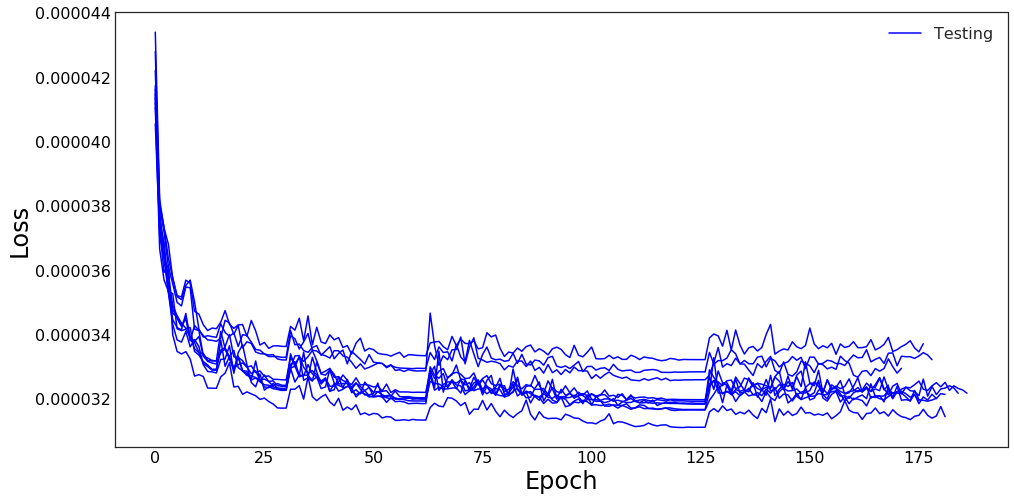

Mean wAUC = 0.0644 +- 0.0008
______________________________________



In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=60, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [7]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [8]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 4 with loss = 3.111461822211938e-05
Model 1 is 1 with loss = 3.1643977733070445e-05
Model 2 is 6 with loss = 3.167476973372304e-05
Model 3 is 8 with loss = 3.18001327327434e-05
Model 4 is 0 with loss = 3.183971189278933e-05
Model 5 is 7 with loss = 3.193131119054049e-05
Model 6 is 9 with loss = 3.197187269371447e-05
Model 7 is 5 with loss = 3.256836939810031e-05
Model 8 is 3 with loss = 3.28266165939809e-05
Model 9 is 2 with loss = 3.319106656852642e-05


## Response on development data

In [9]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000512169489926s per sample

Predicting batch 2 out of 10
Prediction took 0.000287247433626s per sample

Predicting batch 3 out of 10
Prediction took 0.000290234239928s per sample

Predicting batch 4 out of 10
Prediction took 0.000286944448948s per sample

Predicting batch 5 out of 10
Prediction took 0.000286190402508s per sample

Predicting batch 6 out of 10
Prediction took 0.000292121493816s per sample

Predicting batch 7 out of 10
Prediction took 0.000287943947315s per sample

Predicting batch 8 out of 10
Prediction took 0.00028988574587s per sample

Predicting batch 9 out of 10
Prediction took 0.00028418760263s per sample

Predicting batch 10 out of 10
Prediction took 0.000282297266013s per sample



In [10]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.904804808077, weighted 0.940321574323


## Response on val data

In [11]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000294042205811s per sample

Predicting batch 2 out of 10
Prediction took 0.000308425569534s per sample

Predicting batch 3 out of 10
Prediction took 0.000292985630035s per sample

Predicting batch 4 out of 10
Prediction took 0.000288519191742s per sample

Predicting batch 5 out of 10
Prediction took 0.000285966968536s per sample

Predicting batch 6 out of 10
Prediction took 0.000303922605515s per sample

Predicting batch 7 out of 10
Prediction took 0.000295718812943s per sample

Predicting batch 8 out of 10
Prediction took 0.000291910982132s per sample

Predicting batch 9 out of 10
Prediction took 0.000279945421219s per sample

Predicting batch 10 out of 10
Prediction took 0.000279093790054s per sample



In [12]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901752573513, weighted 0.934738749211


## Evaluation

### Import in dataframe

In [13]:
valframe = convertToDF(valData)

50000 candidates loaded


In [14]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

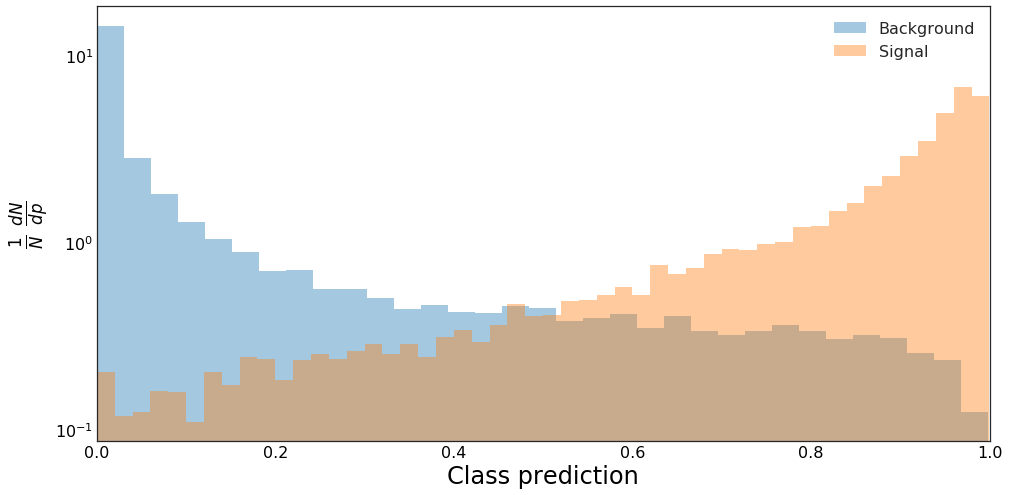

In [15]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [16]:
valframe['ams'] = amsScan(valframe)[0]

[0.9360127449035645, 1.699704394445238]


In [17]:
bests = foldAMSScan(valframe, 10)

[0.9873707294464111, 1.5820636483137263]
Fold 0, best AMS 1.58206364831 at cut of 0.987370729446. Total weights Signal:Bkg. 14.2685070038:8066.71289062


../Modules/Basics.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
../Modules/Basics.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))


[0.9859047532081604, 2.218165348925306]
Fold 1, best AMS 2.21816534893 at cut of 0.985904753208. Total weights Signal:Bkg. 13.6825275421:8310.3125
[0.9420578479766846, 1.7759868048581497]
Fold 2, best AMS 1.77598680486 at cut of 0.942057847977. Total weights Signal:Bkg. 13.7658948898:8019.49511719
[0.9523376822471619, 1.9813054730908886]
Fold 3, best AMS 1.98130547309 at cut of 0.952337682247. Total weights Signal:Bkg. 14.3835887909:8181.48388672
[0.9771695137023926, 2.1750766592531567]
Fold 4, best AMS 2.17507665925 at cut of 0.977169513702. Total weights Signal:Bkg. 13.4360074997:8255.26855469
[0.935711681842804, 1.778622339506656]
Fold 5, best AMS 1.77862233951 at cut of 0.935711681843. Total weights Signal:Bkg. 13.7372360229:8210.55957031
[0.9867712259292603, 2.41732251529863]
Fold 6, best AMS 2.4173225153 at cut of 0.986771225929. Total weights Signal:Bkg. 13.9725170135:8234.15625
[0.9865144491195679, 2.3424047115813296]
Fold 7, best AMS 2.34240471158 at cut of 0.98651444912. Tota

In [18]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000288765382767s per sample

Predicting batch 2 out of 10
Prediction took 0.000283974014629s per sample

Predicting batch 3 out of 10
Prediction took 0.000287007288499s per sample

Predicting batch 4 out of 10
Prediction took 0.000286302401803s per sample

Predicting batch 5 out of 10
Prediction took 0.000287943562594s per sample

Predicting batch 6 out of 10
Prediction took 0.000287917180495s per sample

Predicting batch 7 out of 10
Prediction took 0.00028459350846s per sample

Predicting batch 8 out of 10
Prediction took 0.000291179093448s per sample

Predicting batch 9 out of 10
Prediction took 0.000291942219301s per sample

Predicting batch 10 out of 10
Prediction took 0.000287349544872s per sample



In [21]:
saveTest(0.9360127449035645, 'Day_6')

../Data/Day_6_test.csv


In [22]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_6_test.csv -m"Day_6 DO 30 overall"

Successfully submitted to Higgs Boson Machine Learning Challenge